In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [32]:
student_performance=pd.read_csv('StudentsPerformance.csv')

In [3]:
student_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
student_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
student_performance.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


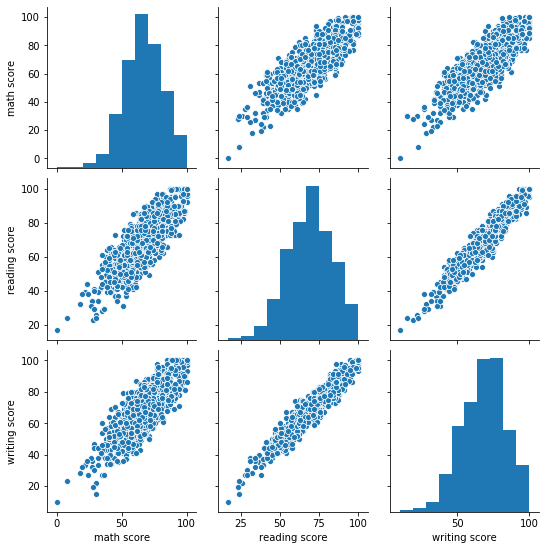

In [7]:
sns.pairplot(student_performance)

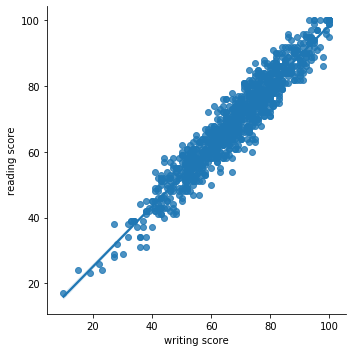

In [11]:
sns.lmplot(x='writing score',y='reading score',data=student_performance)

In [13]:
y=student_performance['reading score']


In [14]:
x=student_performance[['writing score','math score','reading score']]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()

In [20]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-7.40033479e-16  1.42232759e-16  1.00000000e+00]


In [23]:
predictions = lm.predict( x_test)

Text(0, 0.5, 'Predicted Y')

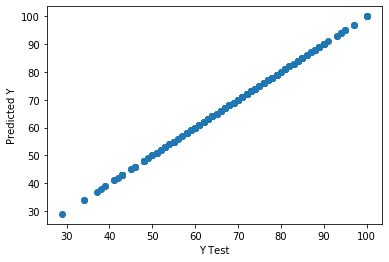

In [27]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [28]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6.0751403907488565e-15
MSE: 7.98116873175605e-29
RMSE: 8.93373870882513e-15


In [30]:
coeffecients = pd.DataFrame(lm.coef_,x.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
writing score,-7.400335e-16
math score,1.422328e-16
reading score,1.000000e+00


In [31]:
#Holding all other features fixed, a 1 unit increase in writing score is associated with a decrease of 7.4 in the reading score.
#Holding all other features fixed, a 1 unit increase in math score is associated with a increase of 1.4 in the reading score.
